<a href="https://colab.research.google.com/github/QuangDuyxyz/AI/blob/main/AI_w6_11_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=9db6b907600248c338856eab6b3722c702a4b7e167c93a6b0013e52eda2df729
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


200.17106400794003


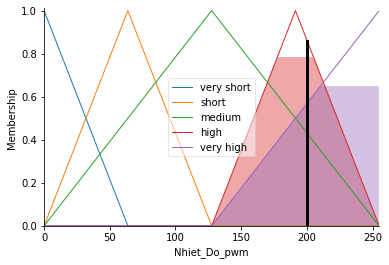

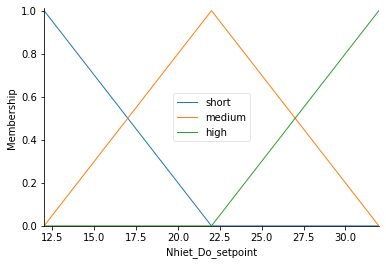

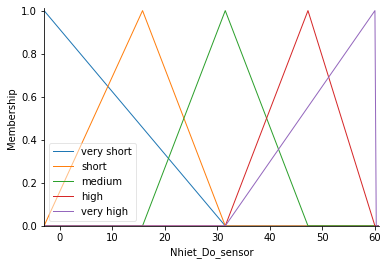

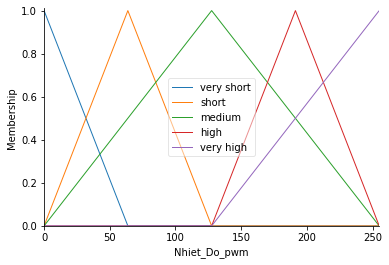

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

Nhiet_Do_setpoint = ctrl.Antecedent(np.arange(12,33,1),'Nhiet_Do_setpoint')
Nhiet_Do_sensor = ctrl.Antecedent(np.arange(-3,61,0.25),'Nhiet_Do_sensor')
Nhiet_Do_pwm = ctrl.Consequent(np.arange(0,255,0.25),'Nhiet_Do_pwm')

Nhiet_Do_setpoint['short']=fuzz.trimf(Nhiet_Do_setpoint.universe,[12,12,22])
Nhiet_Do_setpoint['medium']=fuzz.trimf(Nhiet_Do_setpoint.universe,[12,22,32])
Nhiet_Do_setpoint['high']=fuzz.trimf(Nhiet_Do_setpoint.universe,[22,32,32])

Nhiet_Do_sensor['very short']=fuzz.trimf(Nhiet_Do_sensor.universe,[-3,-3,31.5])
Nhiet_Do_sensor['short']=fuzz.trimf(Nhiet_Do_sensor.universe,[-3,15.75,31.5])
Nhiet_Do_sensor['medium']=fuzz.trimf(Nhiet_Do_sensor.universe,[15.75,31.5,47.25])
Nhiet_Do_sensor['high']=fuzz.trimf(Nhiet_Do_sensor.universe,[31.5,47.25,60])
Nhiet_Do_sensor['very high']=fuzz.trimf(Nhiet_Do_sensor.universe,[31.5,60,60])

Nhiet_Do_pwm['very short']=fuzz.trimf(Nhiet_Do_pwm.universe,[0,0,255/4])
Nhiet_Do_pwm['short']=fuzz.trimf(Nhiet_Do_pwm.universe,[0,255/4,255/2])
Nhiet_Do_pwm['medium']=fuzz.trimf(Nhiet_Do_pwm.universe,[0,255/2,255])
Nhiet_Do_pwm['high']=fuzz.trimf(Nhiet_Do_pwm.universe,[255/2,3*255/4,255])
Nhiet_Do_pwm['very high']=fuzz.trimf(Nhiet_Do_pwm.universe,[255/2,255,255])

rule1 = ctrl.Rule(Nhiet_Do_setpoint['short']&Nhiet_Do_sensor['very short'],Nhiet_Do_pwm['very short'])
rule2 = ctrl.Rule(Nhiet_Do_setpoint['short']&Nhiet_Do_sensor['short'],Nhiet_Do_pwm['short'])
rule3 = ctrl.Rule(Nhiet_Do_setpoint['short']&Nhiet_Do_sensor['medium'],Nhiet_Do_pwm['medium'])
rule4 = ctrl.Rule(Nhiet_Do_setpoint['short']&Nhiet_Do_sensor['high'],Nhiet_Do_pwm['high'])
rule5 = ctrl.Rule(Nhiet_Do_setpoint['short']&Nhiet_Do_sensor['very high'],Nhiet_Do_pwm['very high'])
rule6 = ctrl.Rule(Nhiet_Do_setpoint['medium']&Nhiet_Do_sensor['very short'],Nhiet_Do_pwm['very short'])
rule7 = ctrl.Rule(Nhiet_Do_setpoint['medium']&Nhiet_Do_sensor['short'],Nhiet_Do_pwm['very short'])
rule8 = ctrl.Rule(Nhiet_Do_setpoint['medium']&Nhiet_Do_sensor['medium'],Nhiet_Do_pwm['short'])
rule9 = ctrl.Rule(Nhiet_Do_setpoint['medium']&Nhiet_Do_sensor['high'],Nhiet_Do_pwm['high'])
rule10 = ctrl.Rule(Nhiet_Do_setpoint['medium']&Nhiet_Do_sensor['very high'],Nhiet_Do_pwm['very high'])
rule11 = ctrl.Rule(Nhiet_Do_setpoint['high']&Nhiet_Do_sensor['very short'],Nhiet_Do_pwm['very short'])
rule12 = ctrl.Rule(Nhiet_Do_setpoint['high']&Nhiet_Do_sensor['short'],Nhiet_Do_pwm['very short'])
rule13 = ctrl.Rule(Nhiet_Do_setpoint['high']&Nhiet_Do_sensor['medium'],Nhiet_Do_pwm['very short'])
rule14 = ctrl.Rule(Nhiet_Do_setpoint['high']&Nhiet_Do_sensor['high'],Nhiet_Do_pwm['medium'])
rule15 = ctrl.Rule(Nhiet_Do_setpoint['high']&Nhiet_Do_sensor['very high'],Nhiet_Do_pwm['high'])

pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwming=ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['Nhiet_Do_setpoint']=22
pwming.input['Nhiet_Do_sensor']=50
pwming.compute()
print(pwming.output['Nhiet_Do_pwm'])
Nhiet_Do_pwm.view(sim=pwming)

Nhiet_Do_setpoint.view()
Nhiet_Do_sensor.view()
Nhiet_Do_pwm.view()
